# Project 11 - Mapping Economic Data

In [1]:
# !pip install GDAL-3.1.4-cp39-cp39m-win_amd64.whl
# !pip install Fiona-1.8.17-cp39-cp39m-win_amd64.whl
# !pip install Shapely-1.7.1-cp39-cp39m-win_amd64.whl 
# !pip install geopandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import datetime

In [3]:
import geopandas as gpd

<AxesSubplot:>

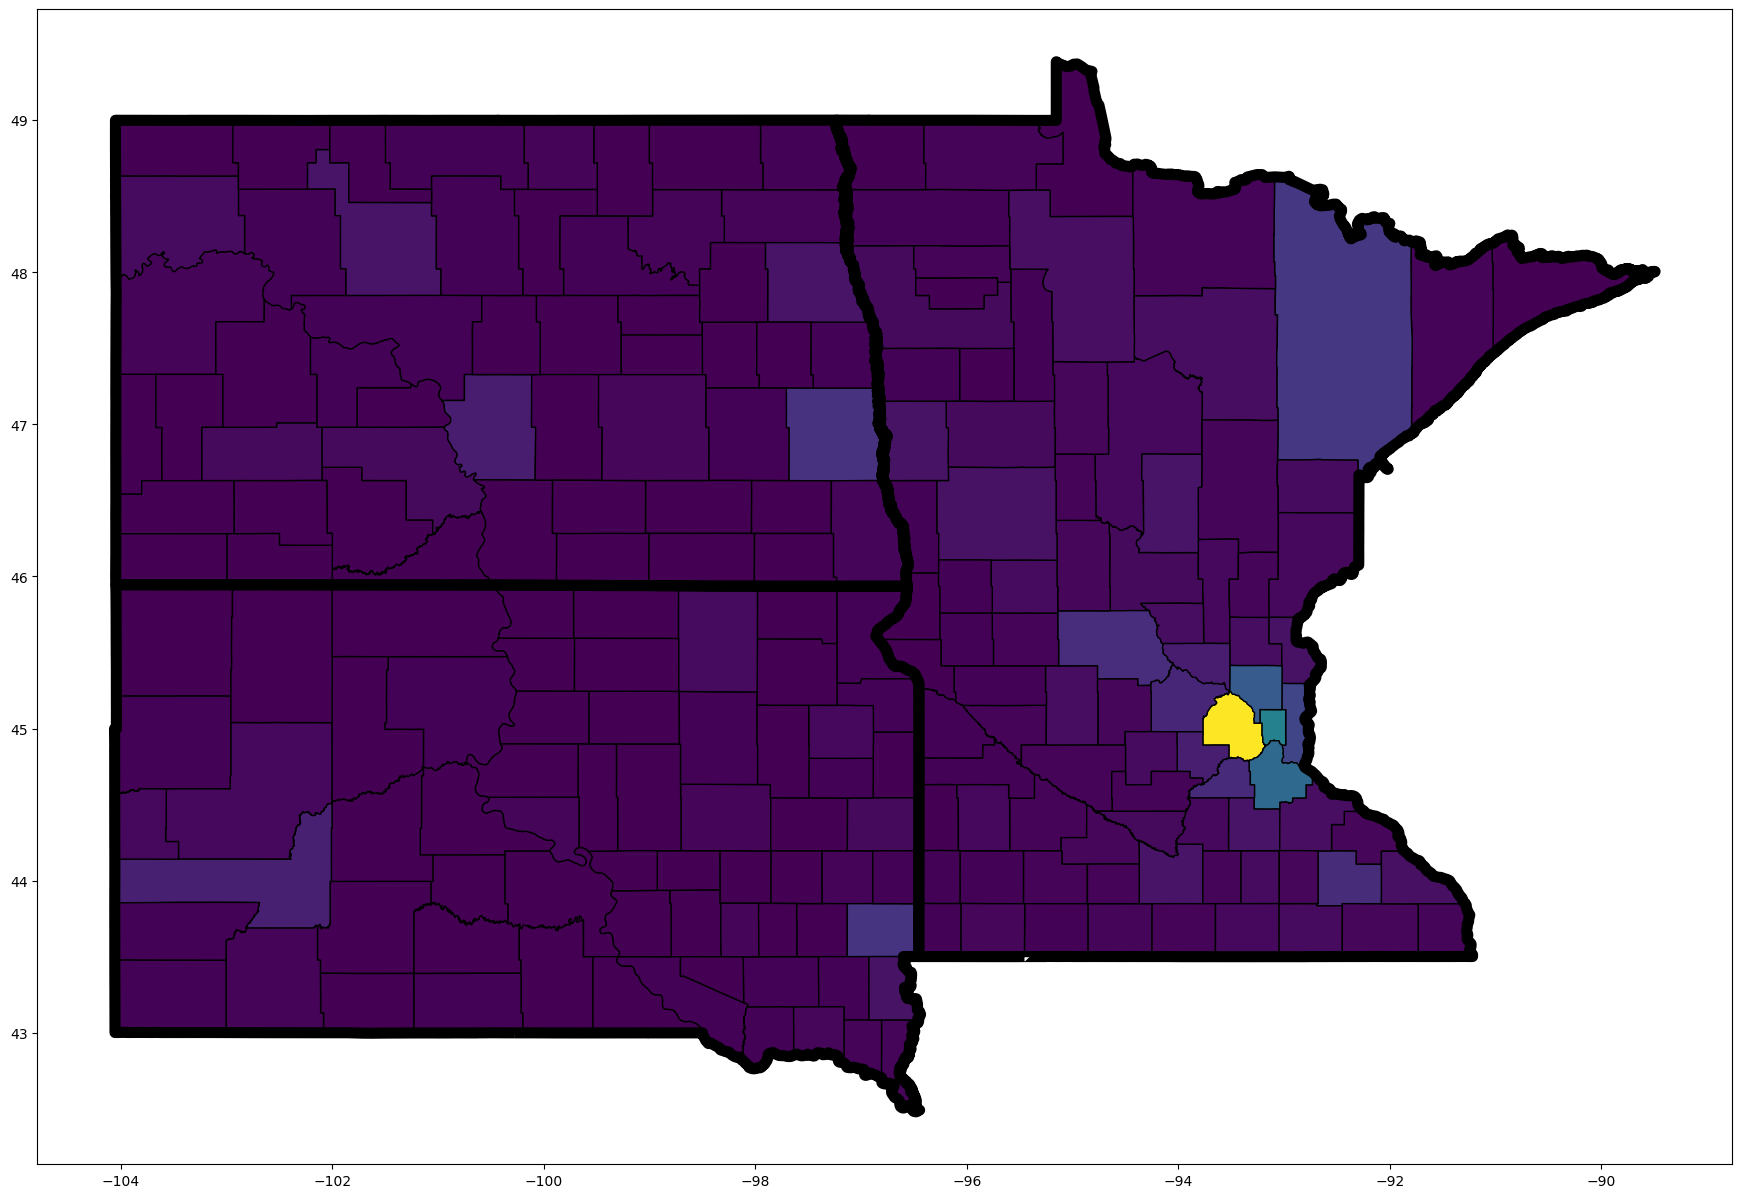

In [4]:
# short demo about how to use plot for geo maps
filename = "countiesWithStatesAndPopulation.shp"
index_col = "FIPS"

states = ["North Dakota",
         "South Dakota",
         "Minnesota"]

map_data = gpd.read_file(filename = filename).set_index(["State", "NAME"])
state_df = map_data.dissolve(by =["State"], aggfunc = "median")


fig, ax = plt.subplots(figsize = (30,15))
map_plot_data = map_data.loc[states]

map_plot_data.plot(column = "Population", cmap = "viridis",
                   alpha = 1, edgecolor = "k",
                  ax = ax)

state_df.loc[states].plot(color = "None",
                         alpha = 1,
                         edgecolor = "k",
                         linewidth = 8,
                         ax = ax)
#map_plot_data.groupby("State").mean().plot(alpha = 1, linewidth = 3)

In [5]:
# create function that organizes and automatically downloads data we need
# from the filename

def import_geo_data(filename, FIPS_name = "FIPS"):
    # import data as map_data
    map_data = gpd.read_file(filename = filename).rename(
        columns = {"State":"state"})
    # use the state and county identifiers to concatenate through conversion 
    # to strings to make a single identifier per each county
    map_data[FIPS_name] = map_data["STATEFP"].astype(str) +\
        map_data["COUNTYFP"].astype(str)
    # convert the new values back to np.64 so they are recognized as numbers
    map_data[FIPS_name] = map_data[FIPS_name].astype(np.int64)
    # set new identifier to index
    map_data.set_index(FIPS_name, inplace = True)
    
    return map_data
map_data = import_geo_data(filename = filename, FIPS_name = index_col)
map_data

STATEFP COUNTYFP  COUNTYNS        AFFGEOID       NAME LSAD       ALAND  \
FIPS                                                                            
21007       21      007  00516850  0500000US21007    Ballard   06   639387454   
21017       21      017  00516855  0500000US21017    Bourbon   06   750439351   
21031       21      031  00516862  0500000US21031     Butler   06  1103571974   
21065       21      065  00516879  0500000US21065     Estill   06   655509930   
21069       21      069  00516881  0500000US21069    Fleming   06   902727151   
...        ...      ...       ...             ...        ...  ...         ...   
31073       31      073  00835858  0500000US31073     Gosper   06  1186616237   
39075       39      075  01074050  0500000US39075     Holmes   06  1094405866   
48171       48      171  01383871  0500000US48171  Gillespie   06  2740719114   
55079       55      079  01581100  0500000US55079  Milwaukee   06   625440563   
26139       26      139  01623012  0500000US26139     Ottawa   06  1459502408   

           AWATER  Population      state  \
FIPS                                       
21007    69473325      7888.0   Kentucky   
21017     4829777     19788.0   Kentucky   
21031    13943044     12879.0   Kentucky   
21065     6516335     14106.0   Kentucky   
21069     7182793     14581.0   Kentucky   
...           ...         ...        ...   
31073    11831826      1990.0   Nebraska   
39075     3695230     43960.0       Ohio   
48171     9012764     26988.0      Texas   
55079  2455383635    945726.0  Wisconsin   
26139  2765830983    291830.0   Michigan   

                                                geometry  
FIPS                                                      
21007  POLYGON ((-89.18137 37.04630, -89.17938 37.053...  
21017  POLYGON ((-84.44266 38.28324, -84.44114 38.283...  
21031  POLYGON ((-86.94486 37.07341, -86.94346 37.074...  
21065  POLYGON ((-84.12662 37.64540, -84.12483 37.646...  
21069  POLYGON ((-83.98428 38.44549, -83.98246 38.450...  
...                                                  ...  
31073  POLYGON ((-100.09510 40.43866, -100.08937 40.4...  
39075  POLYGON ((-82.22066 40.66758, -82.19327 40.667...  
48171  POLYGON ((-99.30400 30.49983, -99.28234 30.499...  
55079  POLYGON ((-88.06959 42.86726, -88.06959 42.872...  
26139  POLYGON ((-86.26432 43.11830, -86.25103 43.118...  

[3142 rows x 11 columns]

<AxesSubplot:>

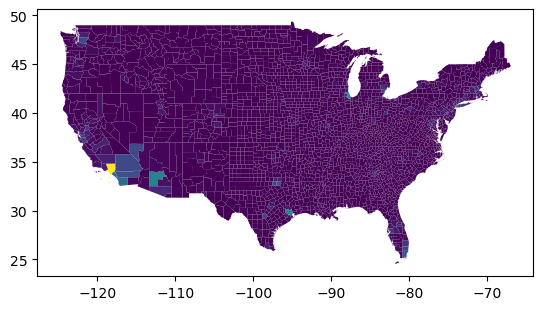

In [6]:
# plot all counties except for hawaii and alaska

# the key to eliminate these two is with a tilde in front of map_data 
# in second call of the list

map_data[~map_data["state"].isin(
    ["Hawaii", "Alaska"])].plot(column = "Population")

In [7]:
u_data = pd.read_csv("countyUnemploymentData.csv",
                     # sometimes encoding can generate an error, this 
                     # is one situation where if you don't specify
                     # latin1 encoding, there will not be proper download
                    encoding = "latin1",
                    parse_dates = True,
                    index_col = ["date","fips_code"])

# shorten u_data to small amount
u_data = u_data[list(u_data.keys())[-4:]]
u_data

C:\Users\Bryce Grabanski\AppData\Local\Temp\ipykernel_2824\49784342.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  u_data = pd.read_csv("countyUnemploymentData.csv",


Labor Force Employed Unemployed Unemployment Rate
date       fips_code                                                  
2019-08-01 1001           26,079   25,368        711               2.7
           1003           97,939   95,367      2,572               2.6
           1005            8,652    8,322        330               3.8
           1007            8,670    8,403        267               3.1
           1009           25,309   24,641        668               2.6
...                          ...      ...        ...               ...
2021-06-01 72145          12,993   11,580      1,413              10.9
           72147           2,610    2,288        322              12.3
           72149           6,940    6,152        788              11.4
           72151           8,352    7,480        872              10.4
           72153           9,212    8,127      1,085              10.4

[74037 rows x 4 columns]

In [8]:
u_data.dtypes

Labor Force          object
Employed             object
Unemployed           object
Unemployment Rate    object
dtype: object

In [9]:
# convert type of data in u_data values to np.64.

for key in u_data.keys():
        u_data[key] = pd.to_numeric(u_data[key], errors = "coerce")
u_data.dtypes

Labor Force          float64
Employed             float64
Unemployed           float64
Unemployment Rate    float64
dtype: object

In [10]:
import copy as copy

# create merged data in a geo dataframe using a function to concatenate info
def create_merged_geo_dataframe(data, map_data):
    data_frame_initialized = False
    matching_gpd = {}
    counties = data.groupby("fips_code").mean().index.unique()
    dates = data.groupby("date").mean().index.unique()
    for key, val in data.items():
        matching_gpd[key] = copy.copy(map_data[map_data.index.isin(counties)])
        for date in dates:
            val_slice = val.loc[date]
            val_slice.reset_index().set_index("fips_code")
            matching_gpd[key][date] = val_slice
    return matching_gpd
dates = u_data.groupby("date").mean().index.unique()
u_data = create_merged_geo_dataframe(u_data, map_data)

In [11]:
dates

DatetimeIndex(['2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01',
               '2019-12-01', '2020-01-01', '2020-02-01', '2020-03-01',
               '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01',
               '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01',
               '2020-12-01', '2021-01-01', '2021-02-01', '2021-03-01',
               '2021-04-01', '2021-05-01', '2021-06-01'],
              dtype='datetime64[ns]', name='date', freq=None)

In [12]:
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [13]:
# matplotlib will give us warning because we are setting the value a slice
import warnings
warnings.filterwarnings("ignore")
# Normalize Unemployment Feb-20 == 1
key = "Unemployment Rate"
new_key = "Normalized " + key + " (Feb 2020)"
# df.copy() makes a copy of the dataframe
u_data[new_key] = u_data[key].copy()
# take the difference between the observed rate and the Feb rate

# extremely useful function where we use our previous
for date in dates:
    u_data[new_key][date] = u_data[key][date].sub(
        u_data[key][datetime.datetime(2020,2,1)])

In [14]:
new_key

'Normalized Unemployment Rate (Feb 2020)'

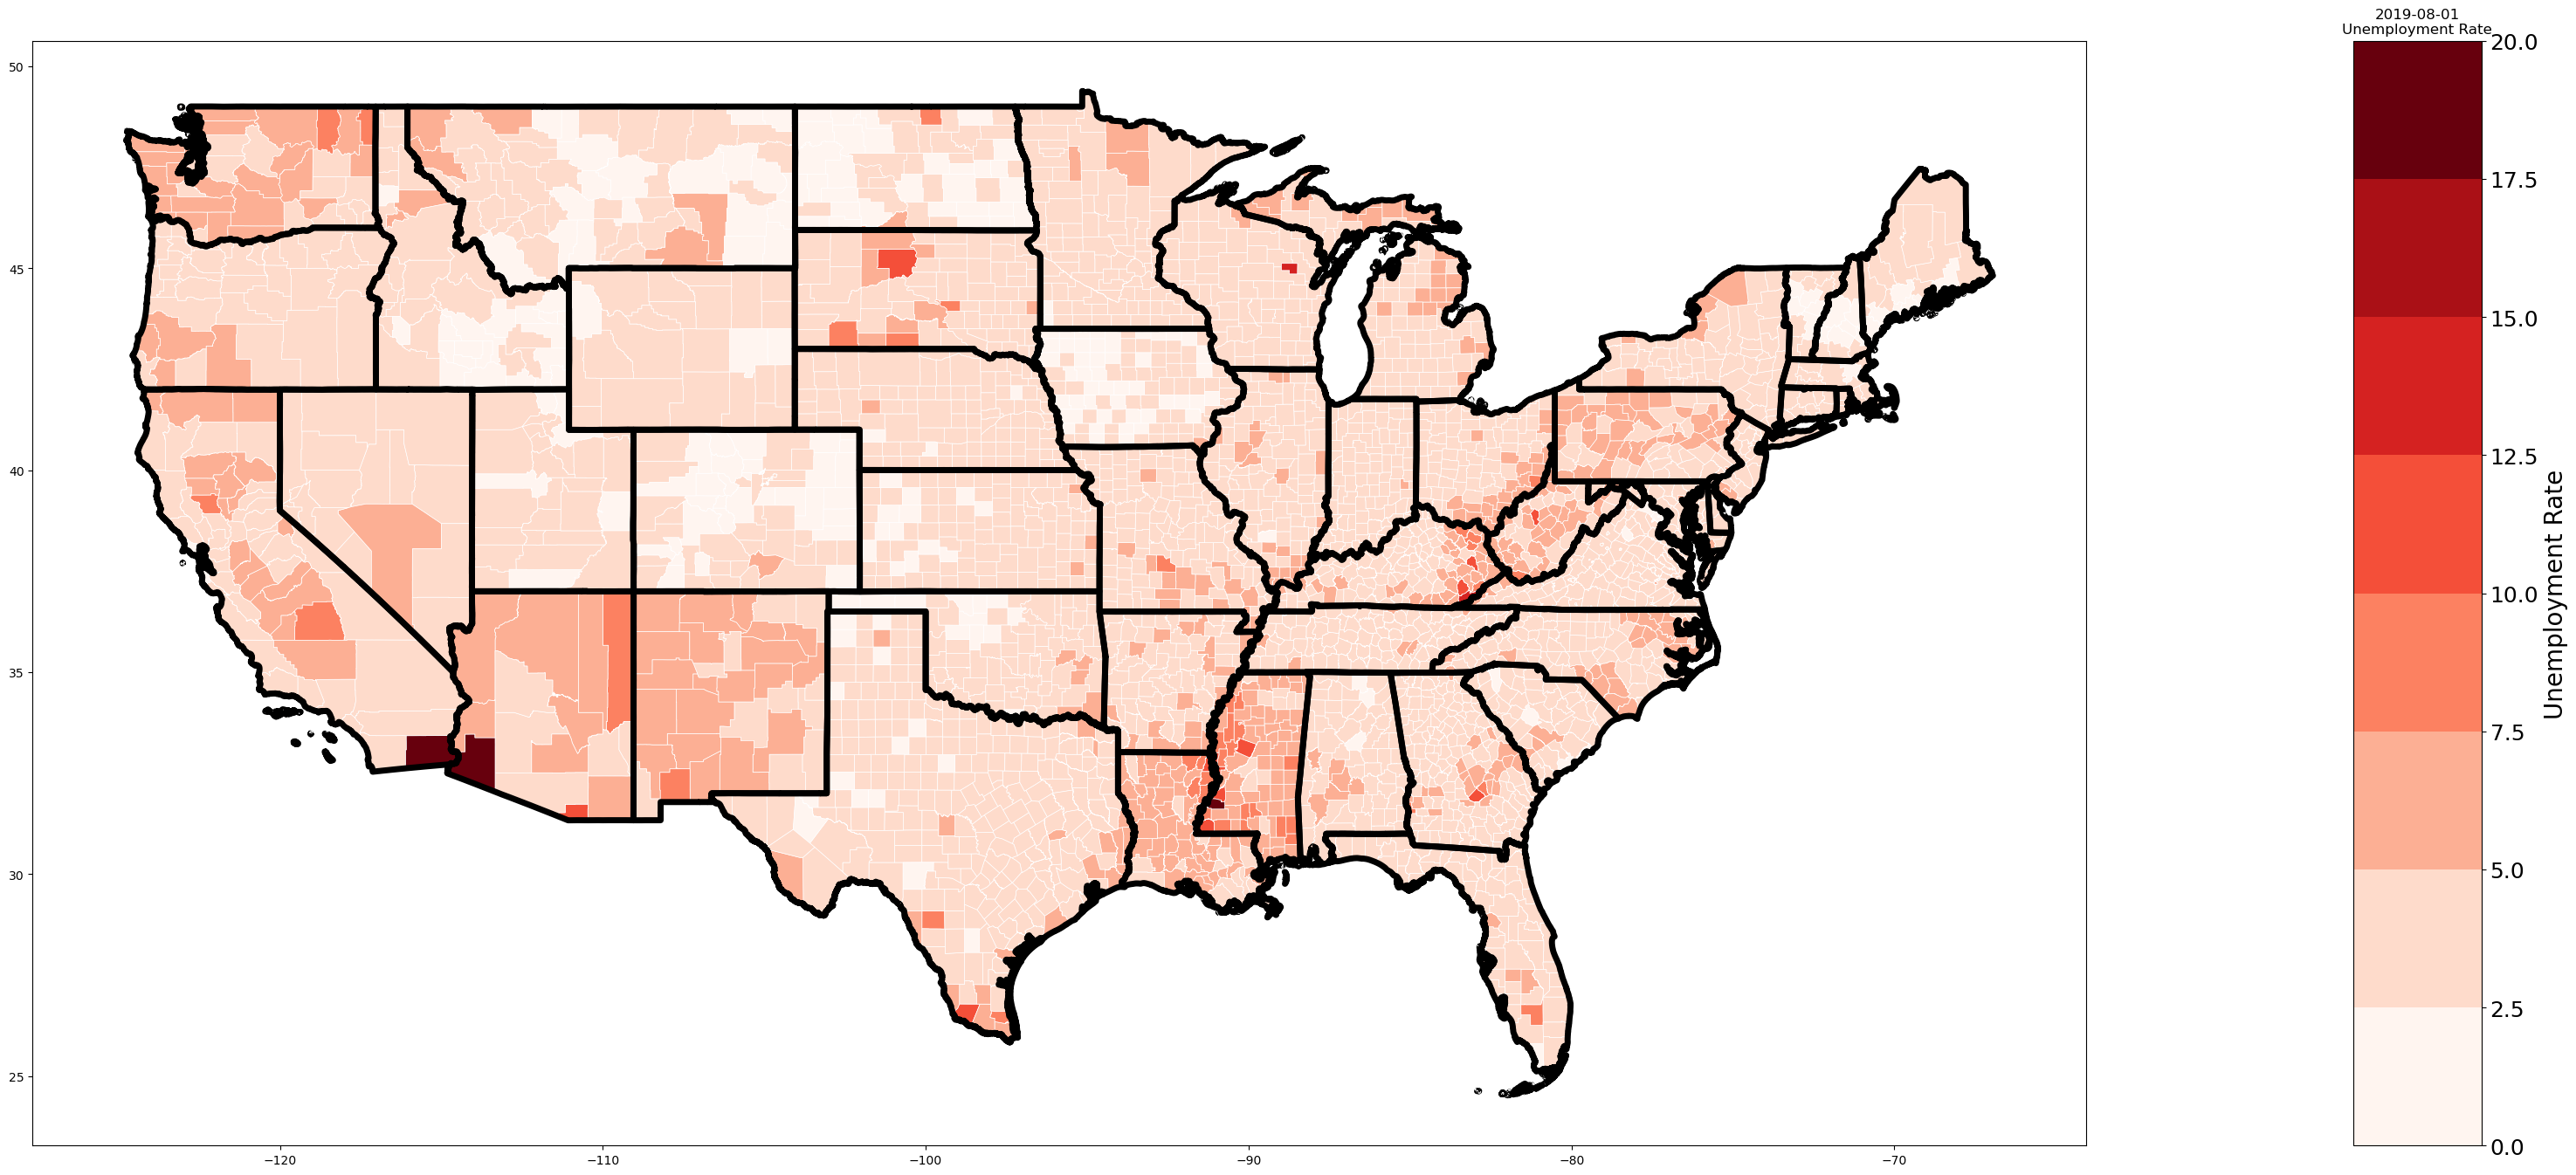

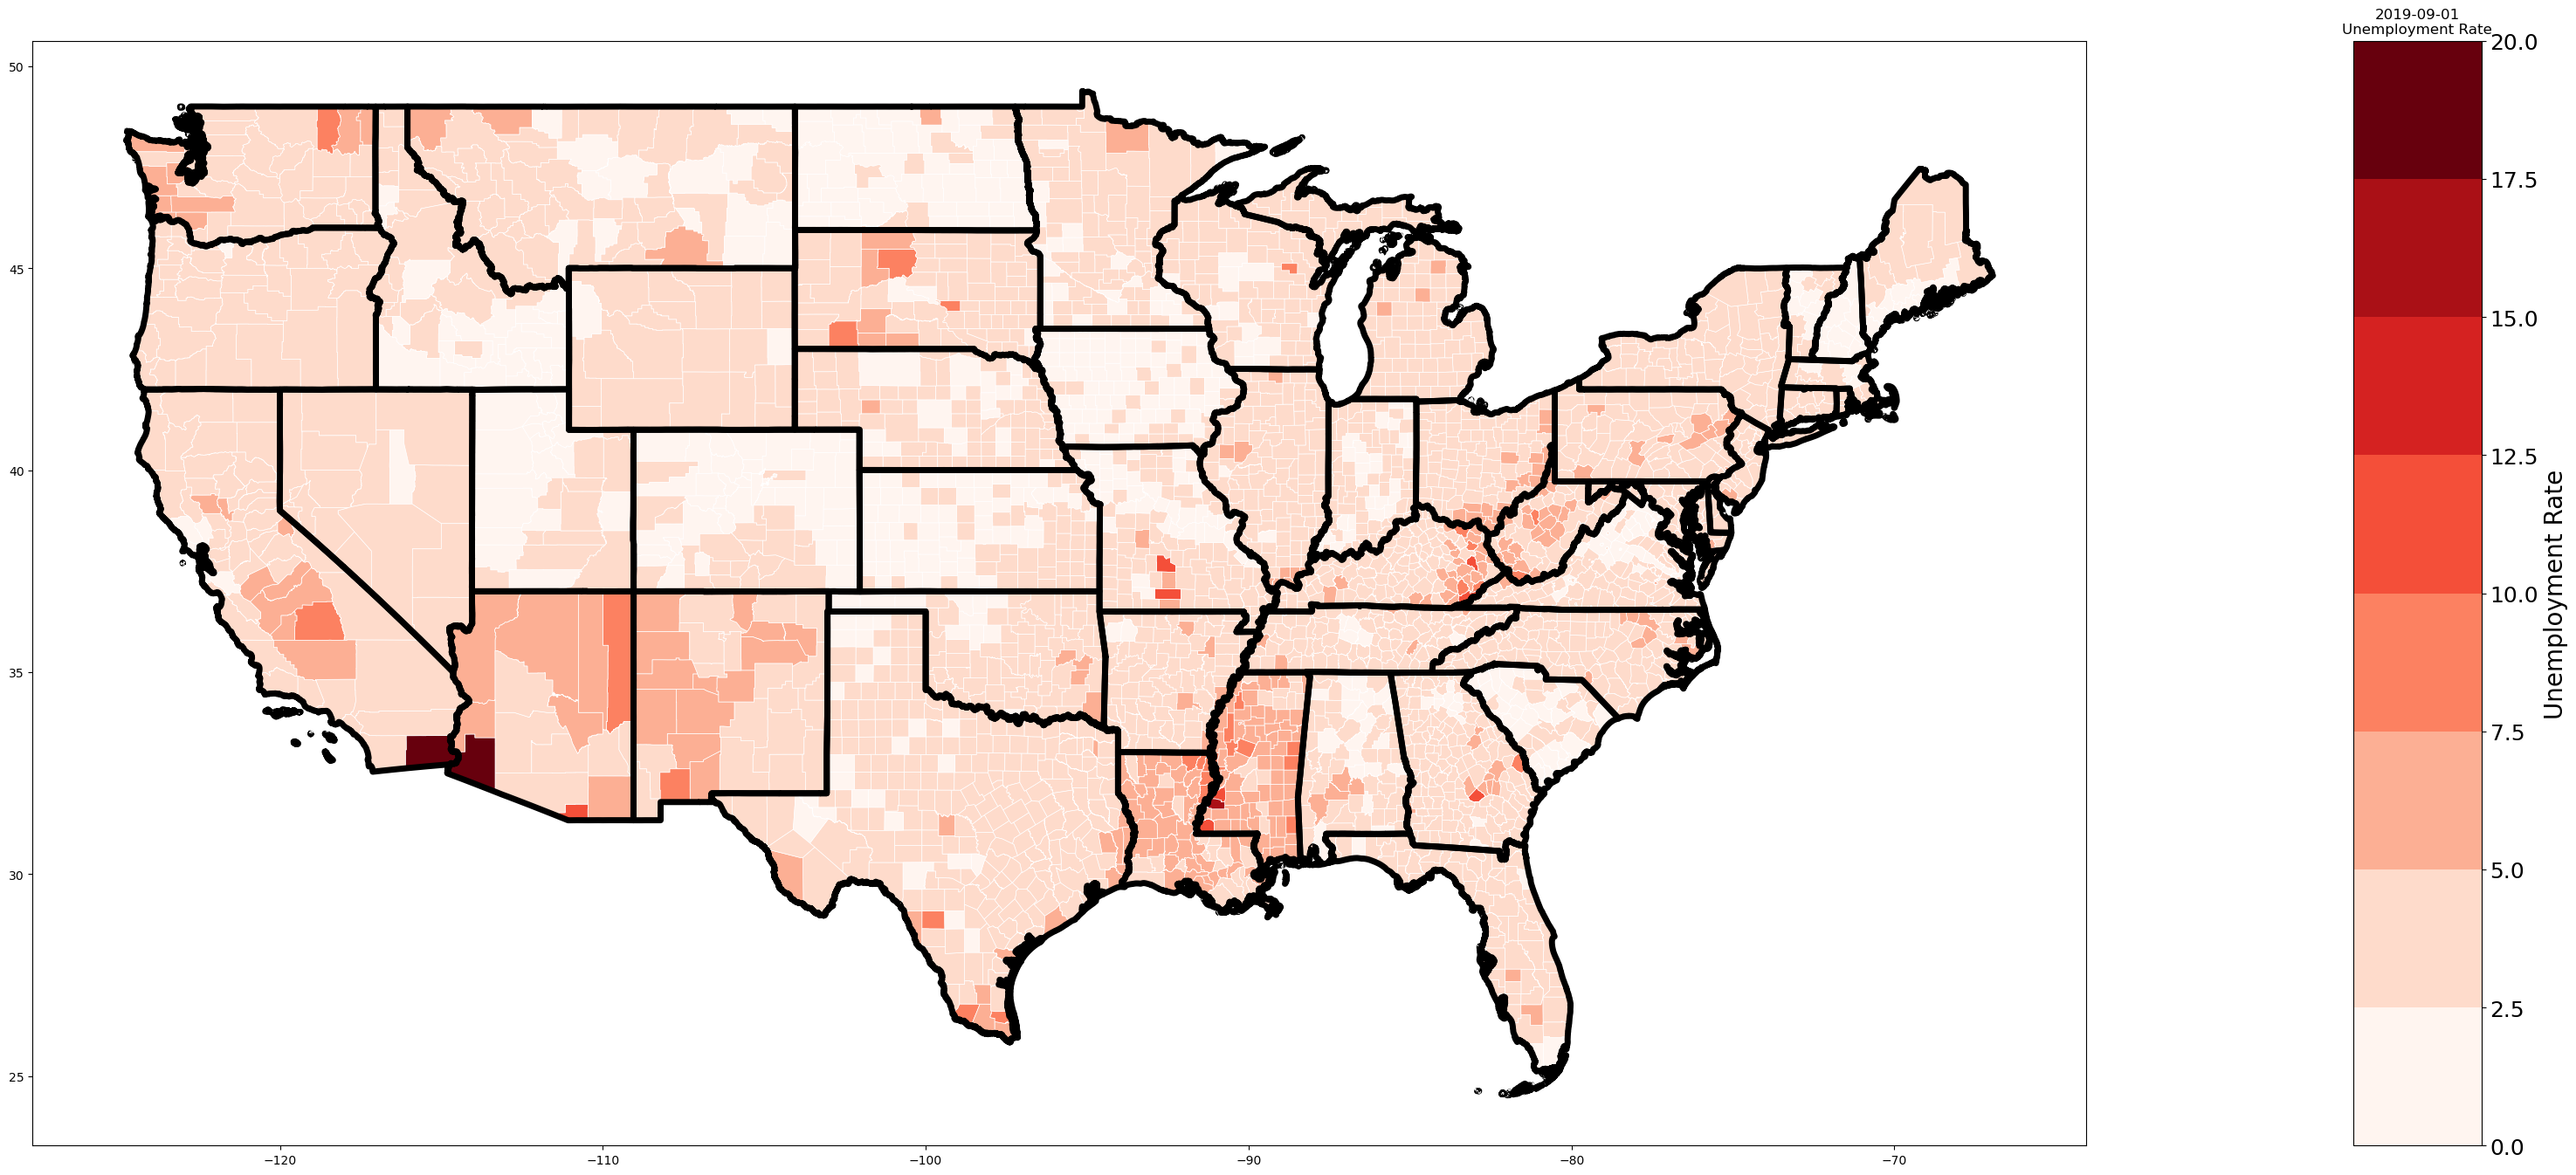

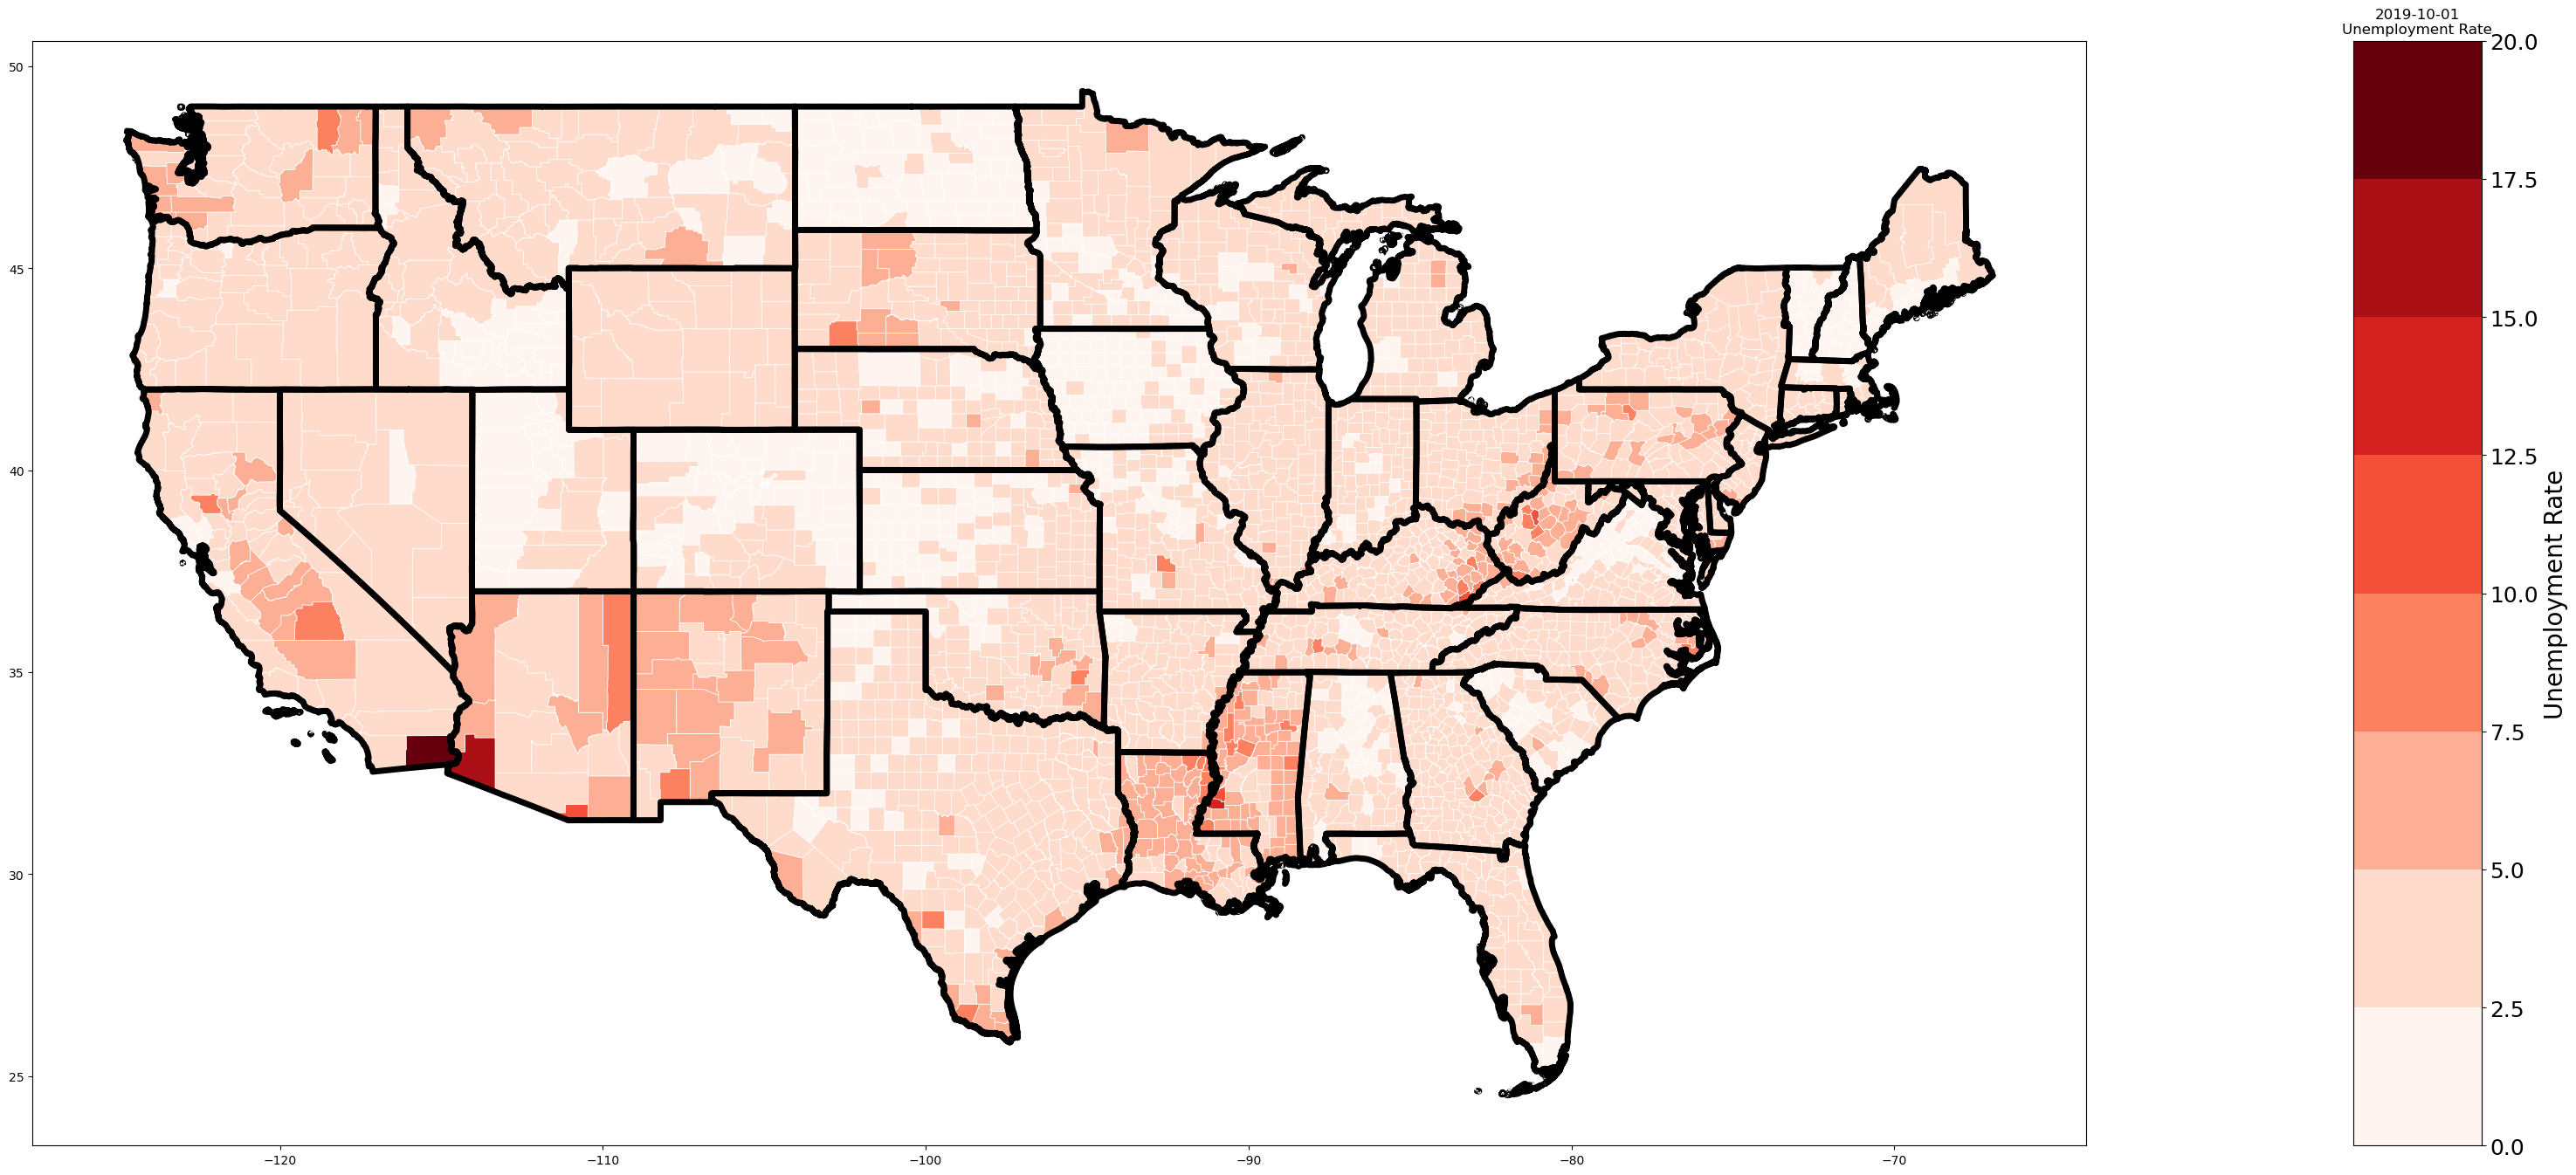

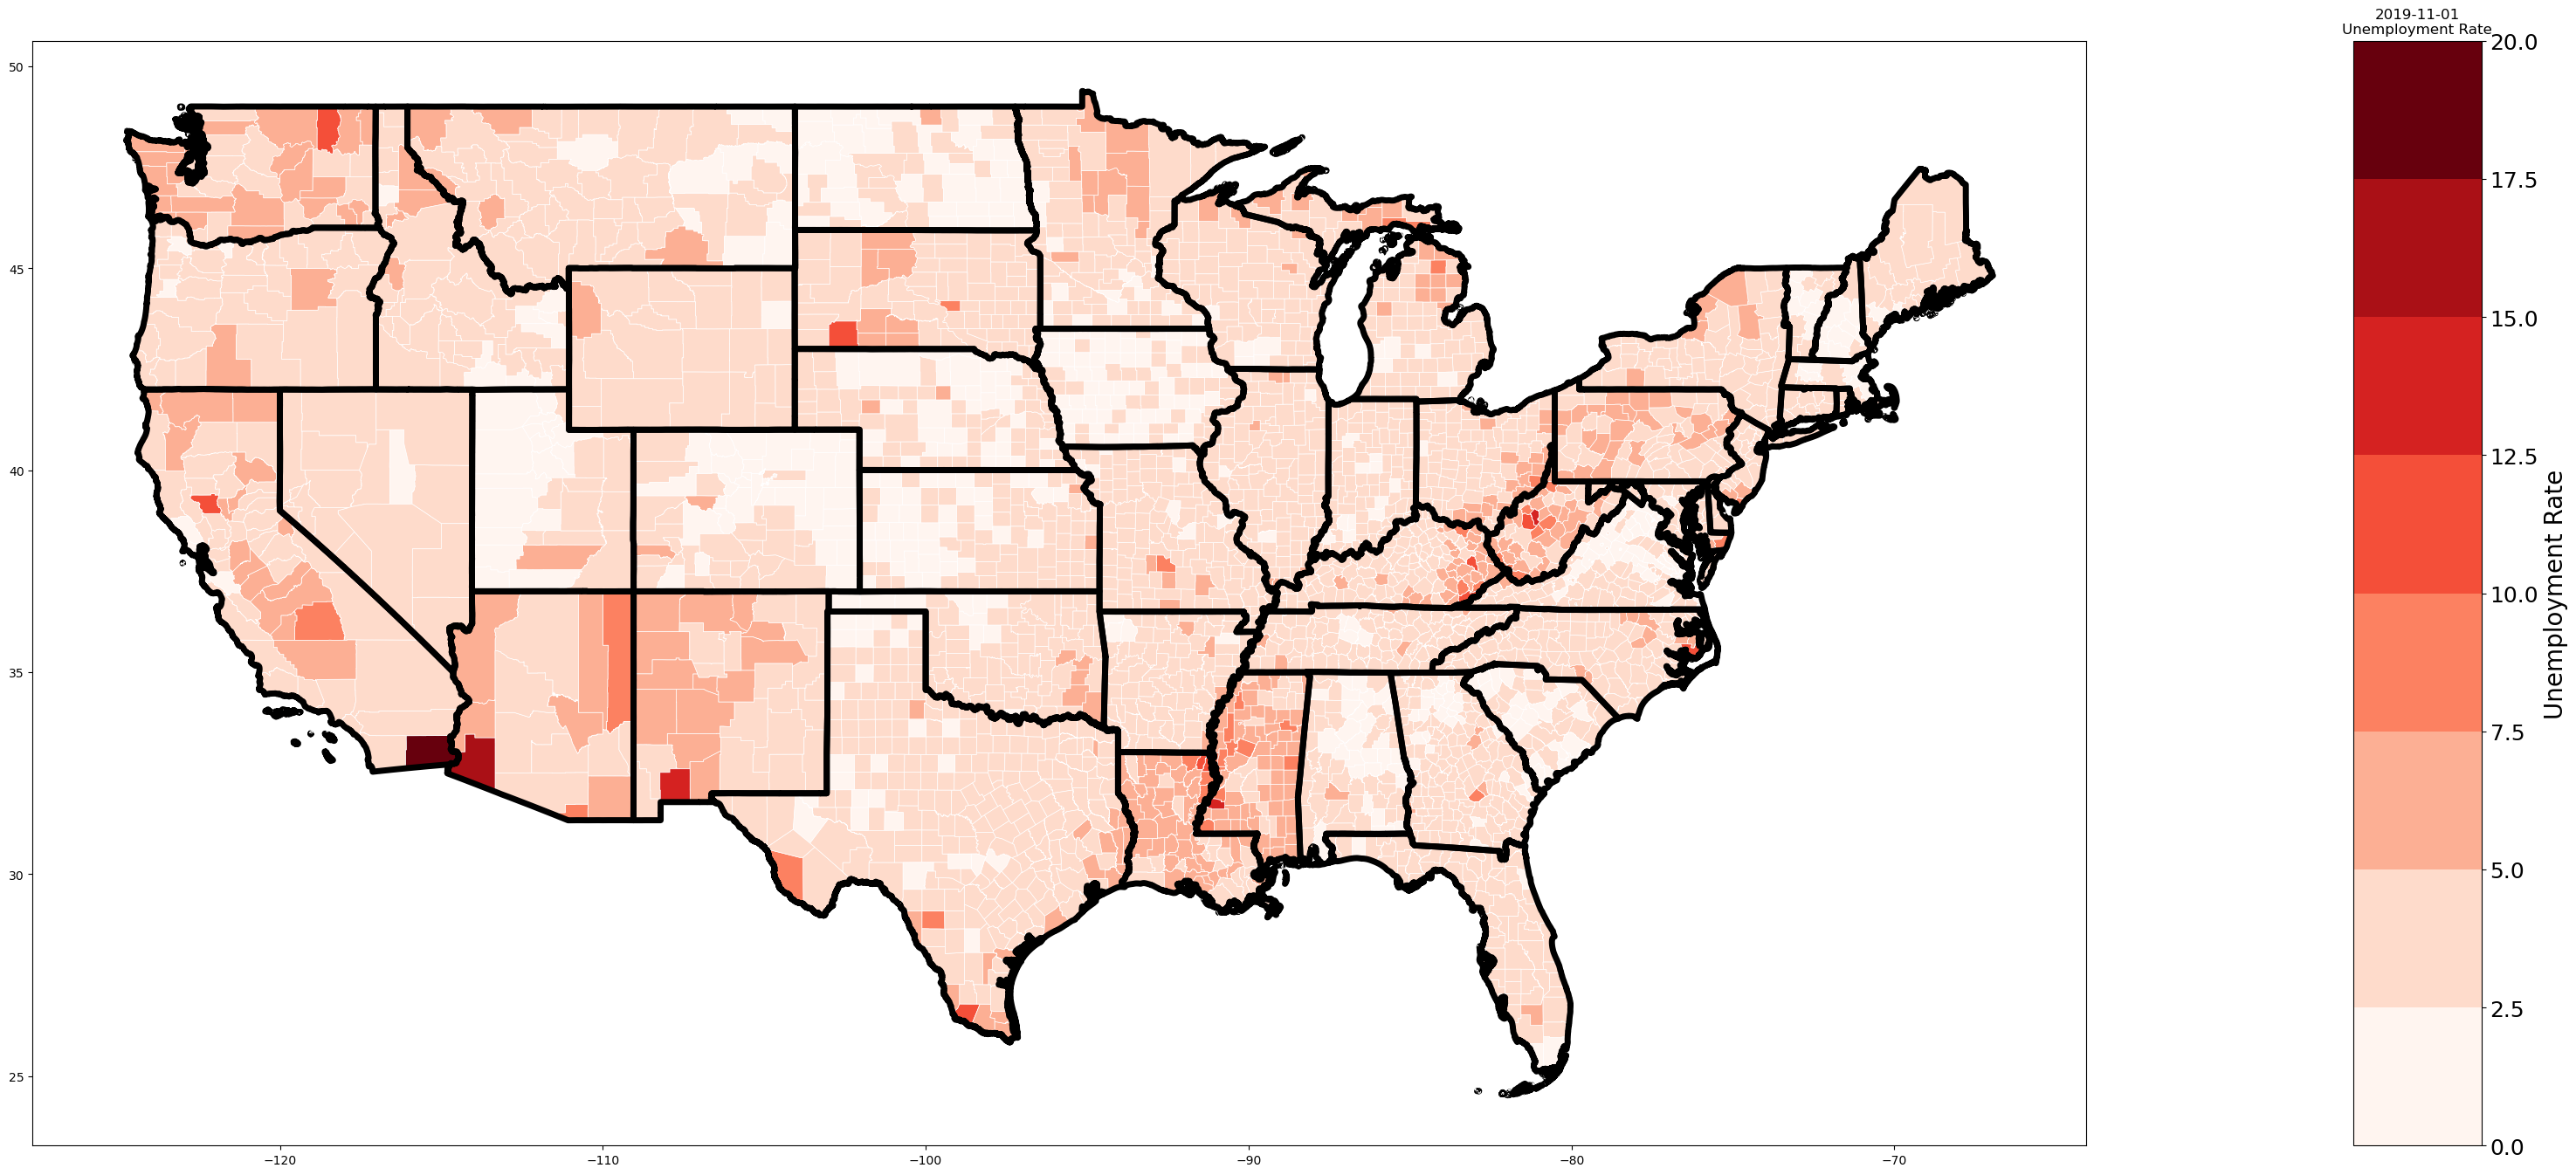

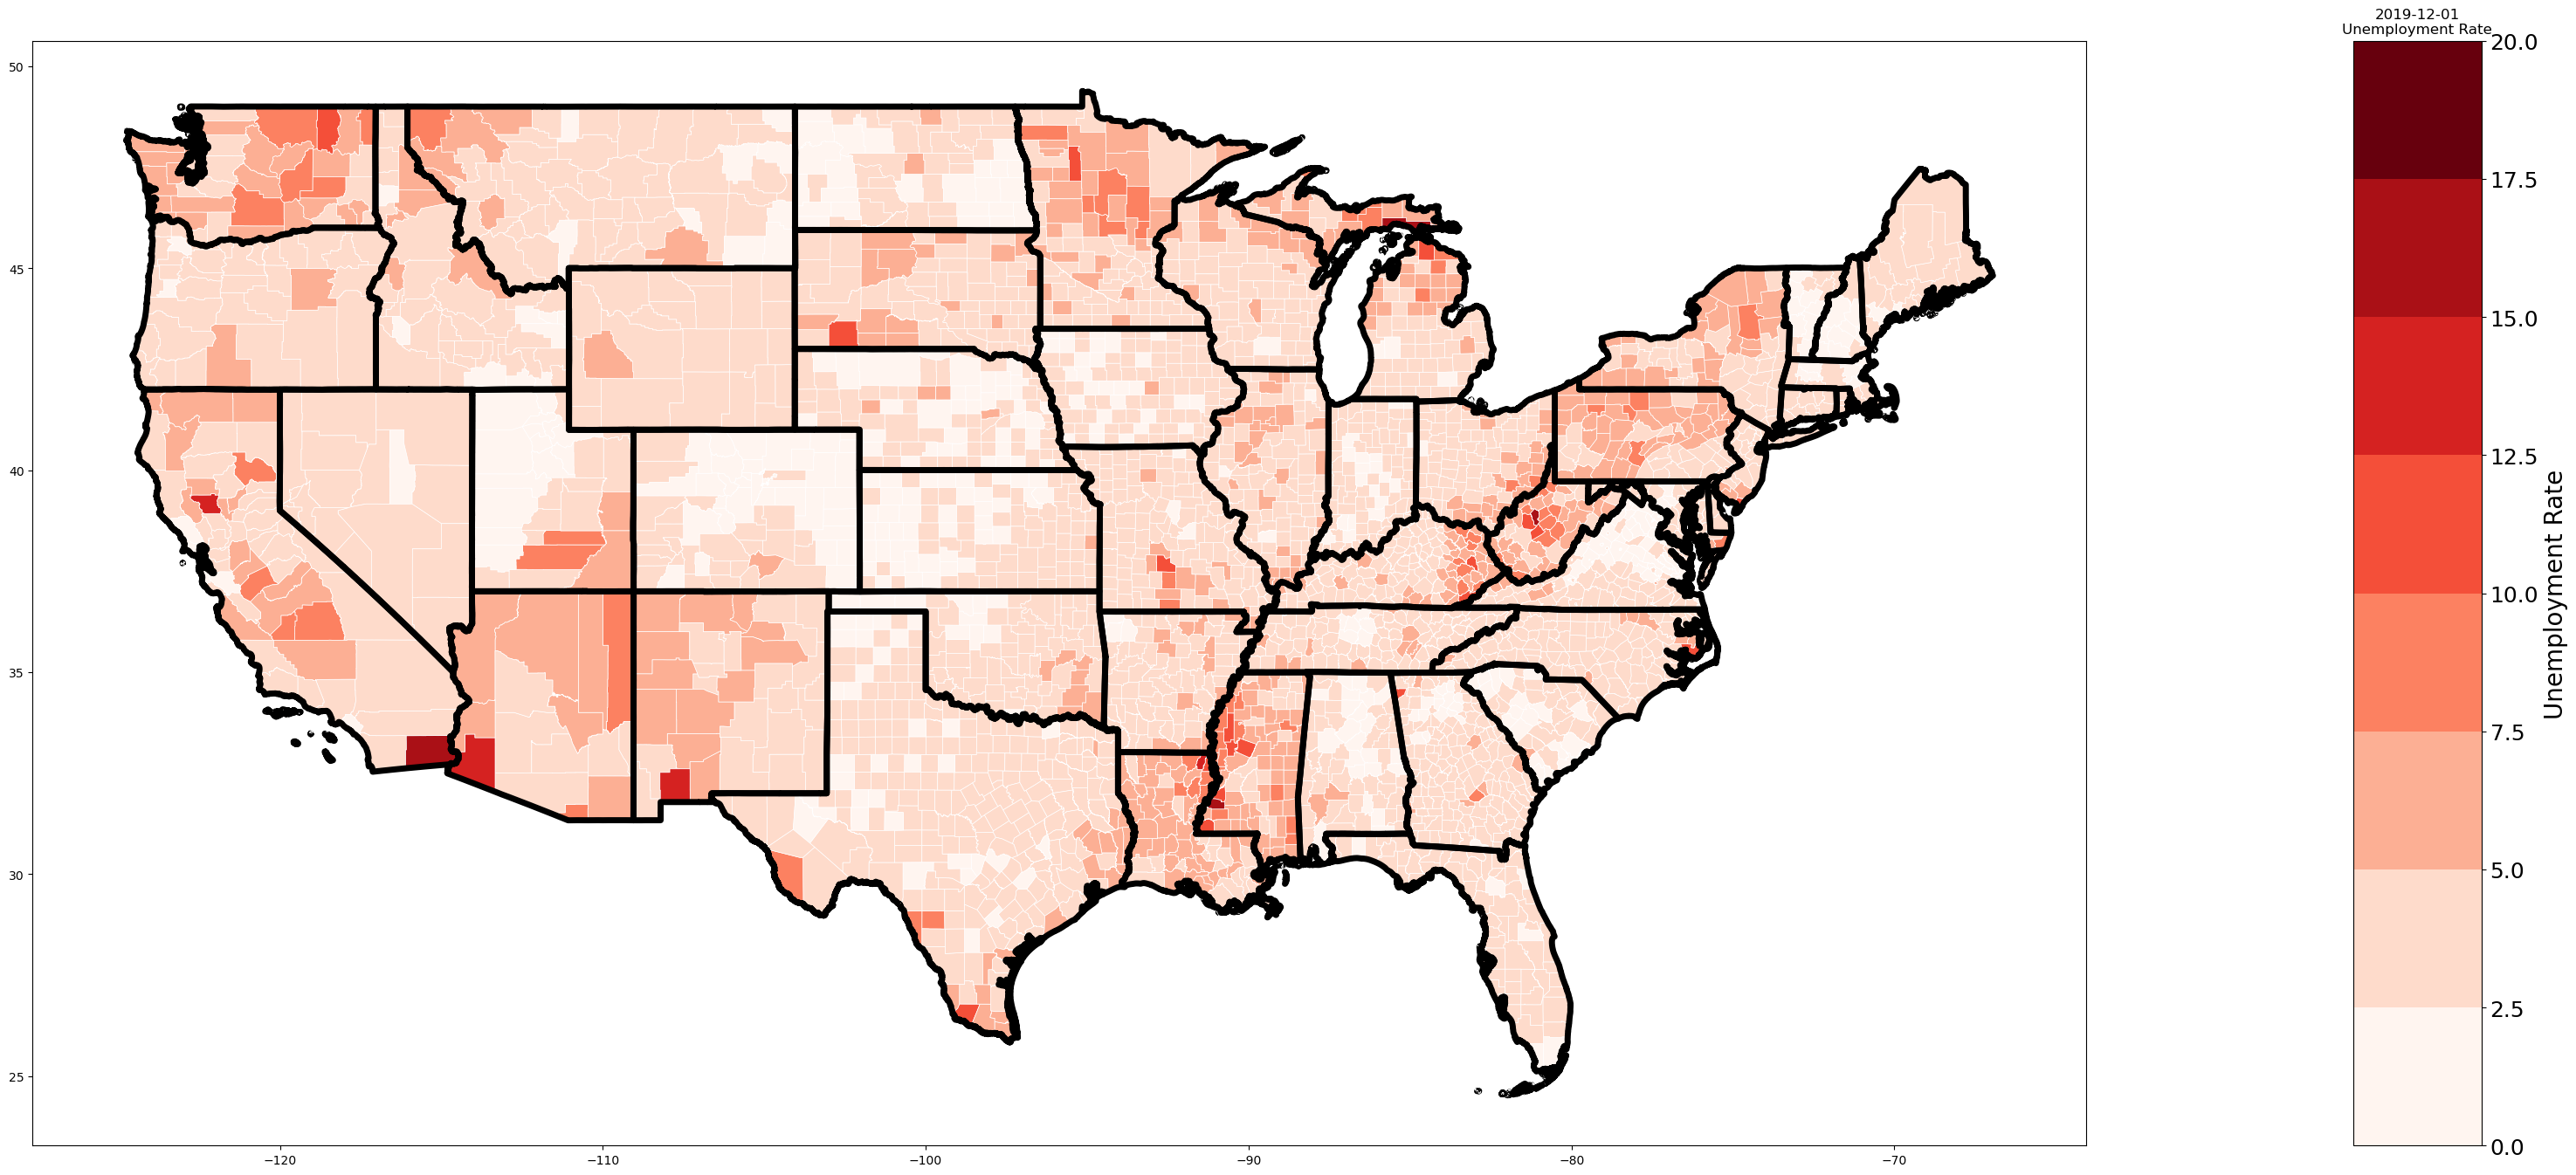

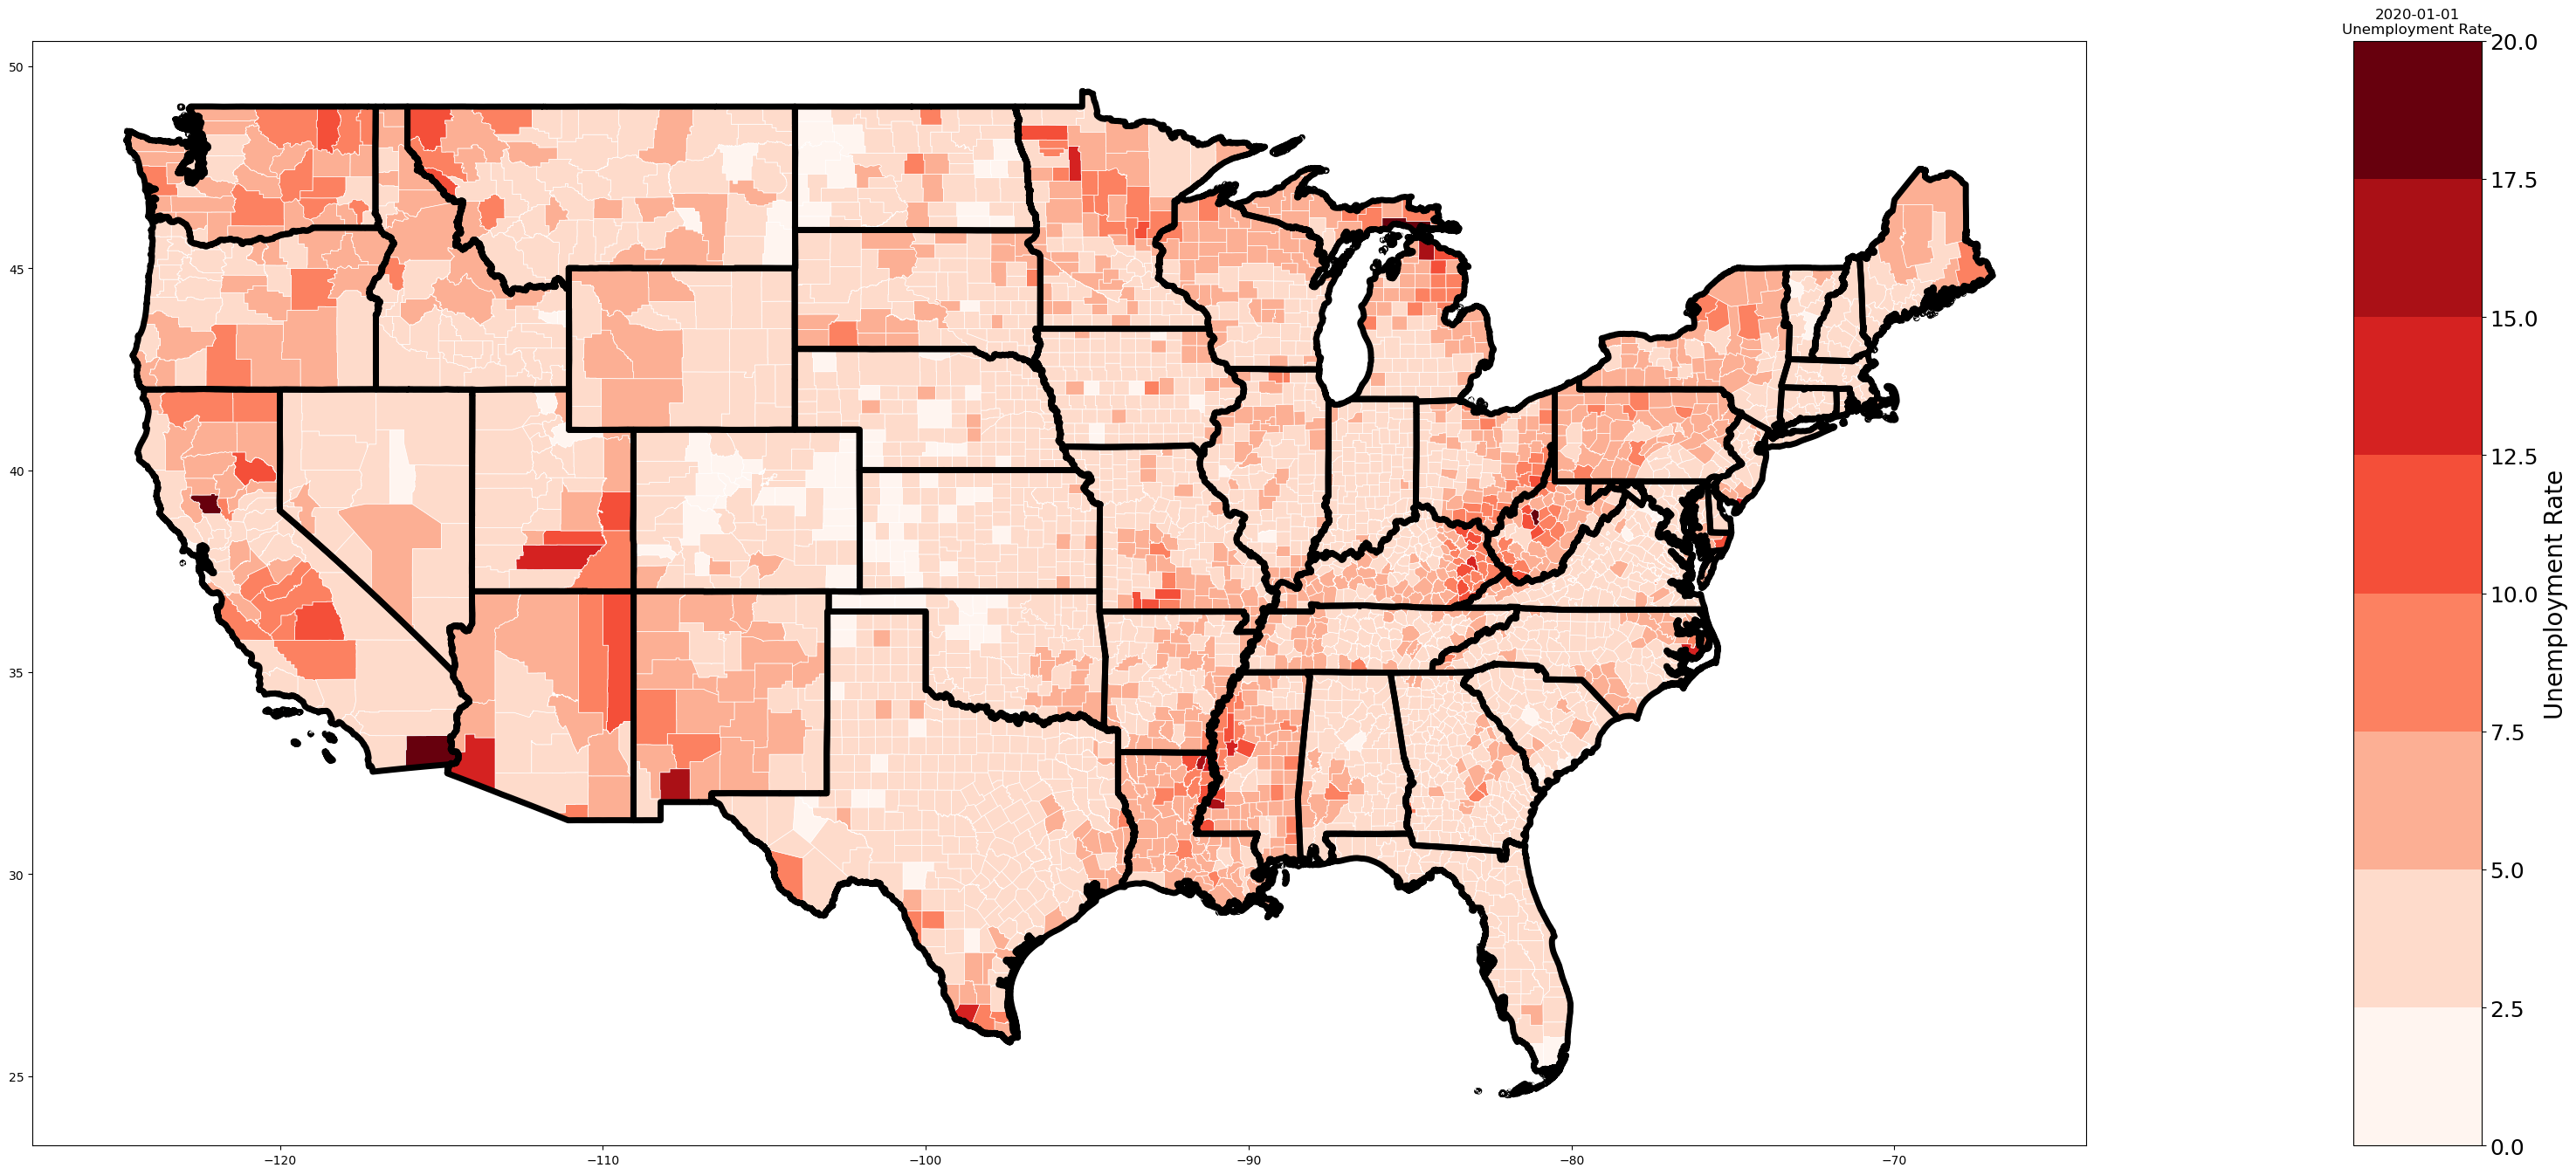

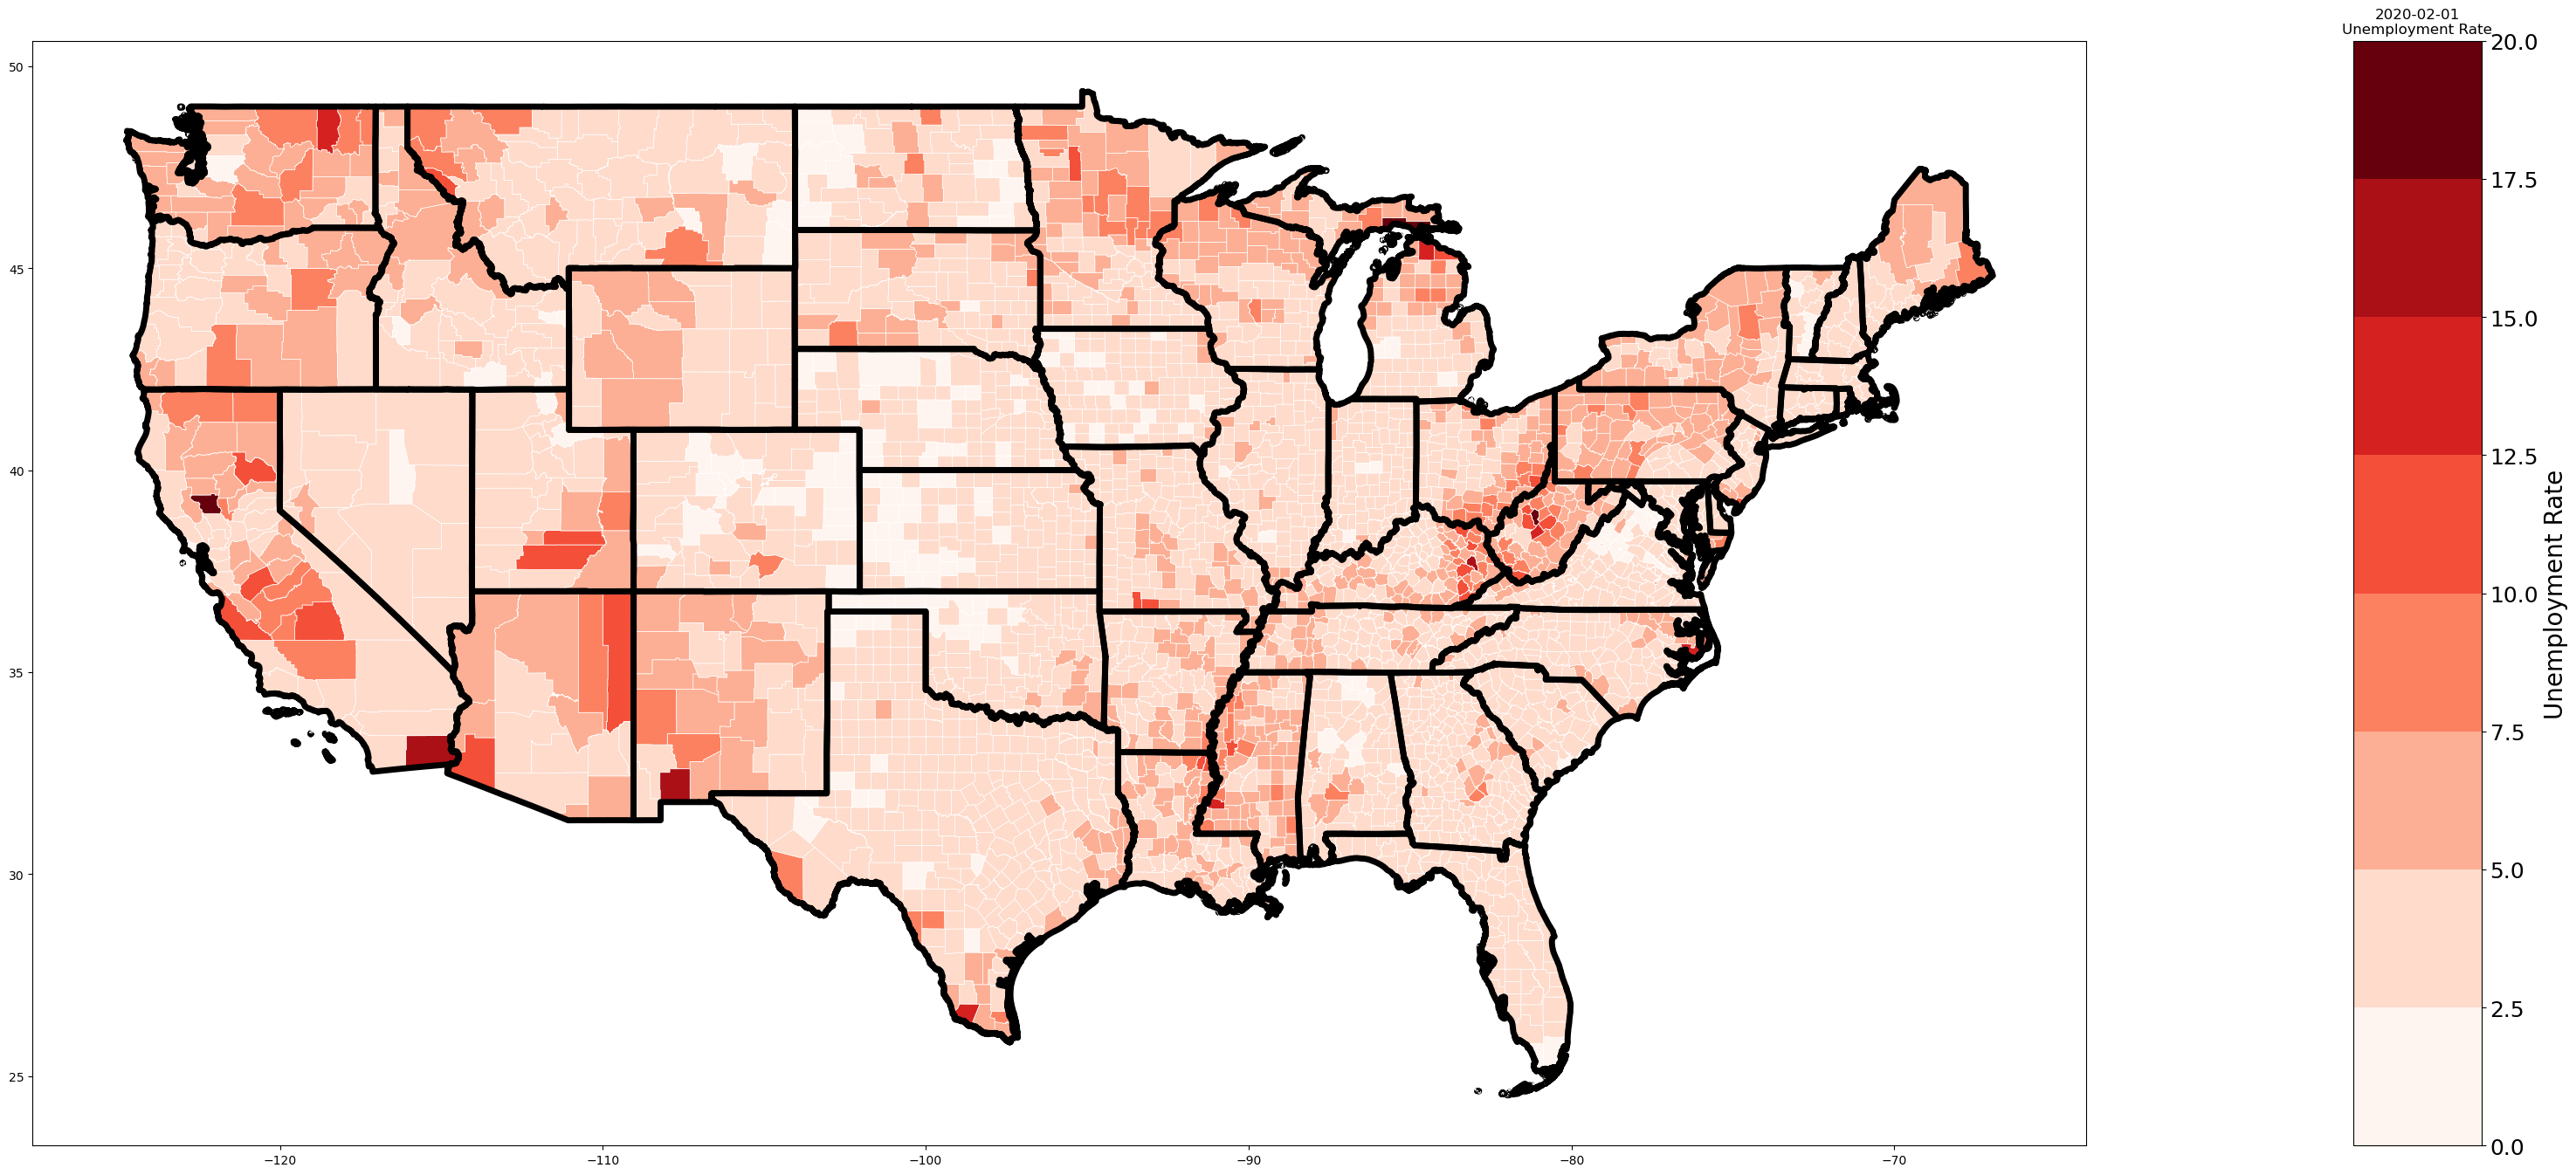

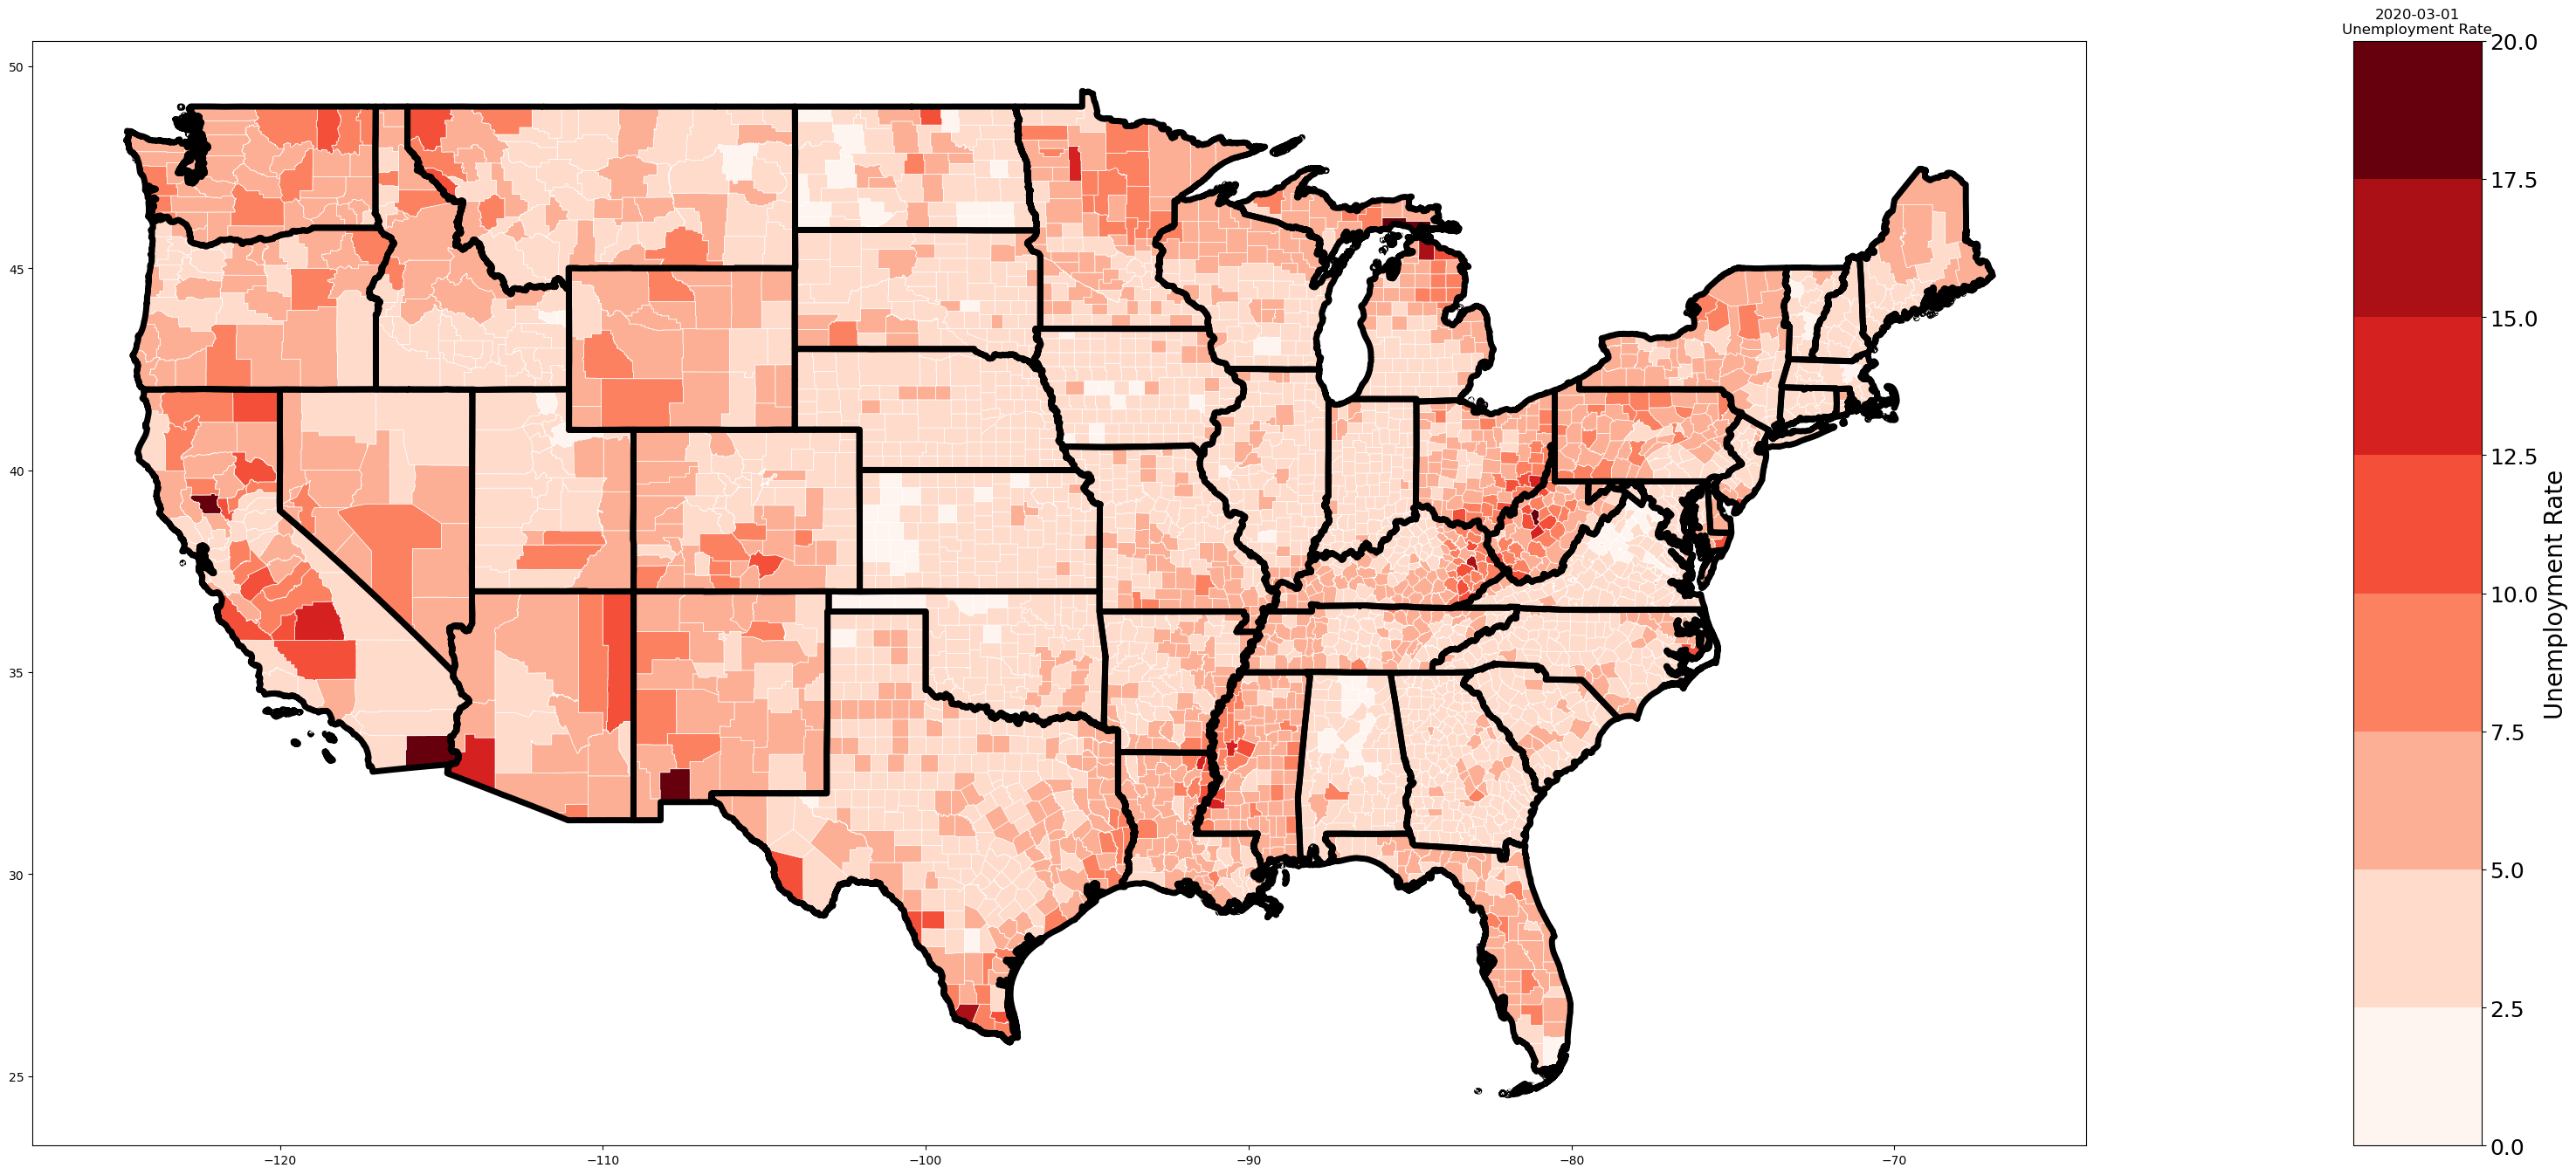

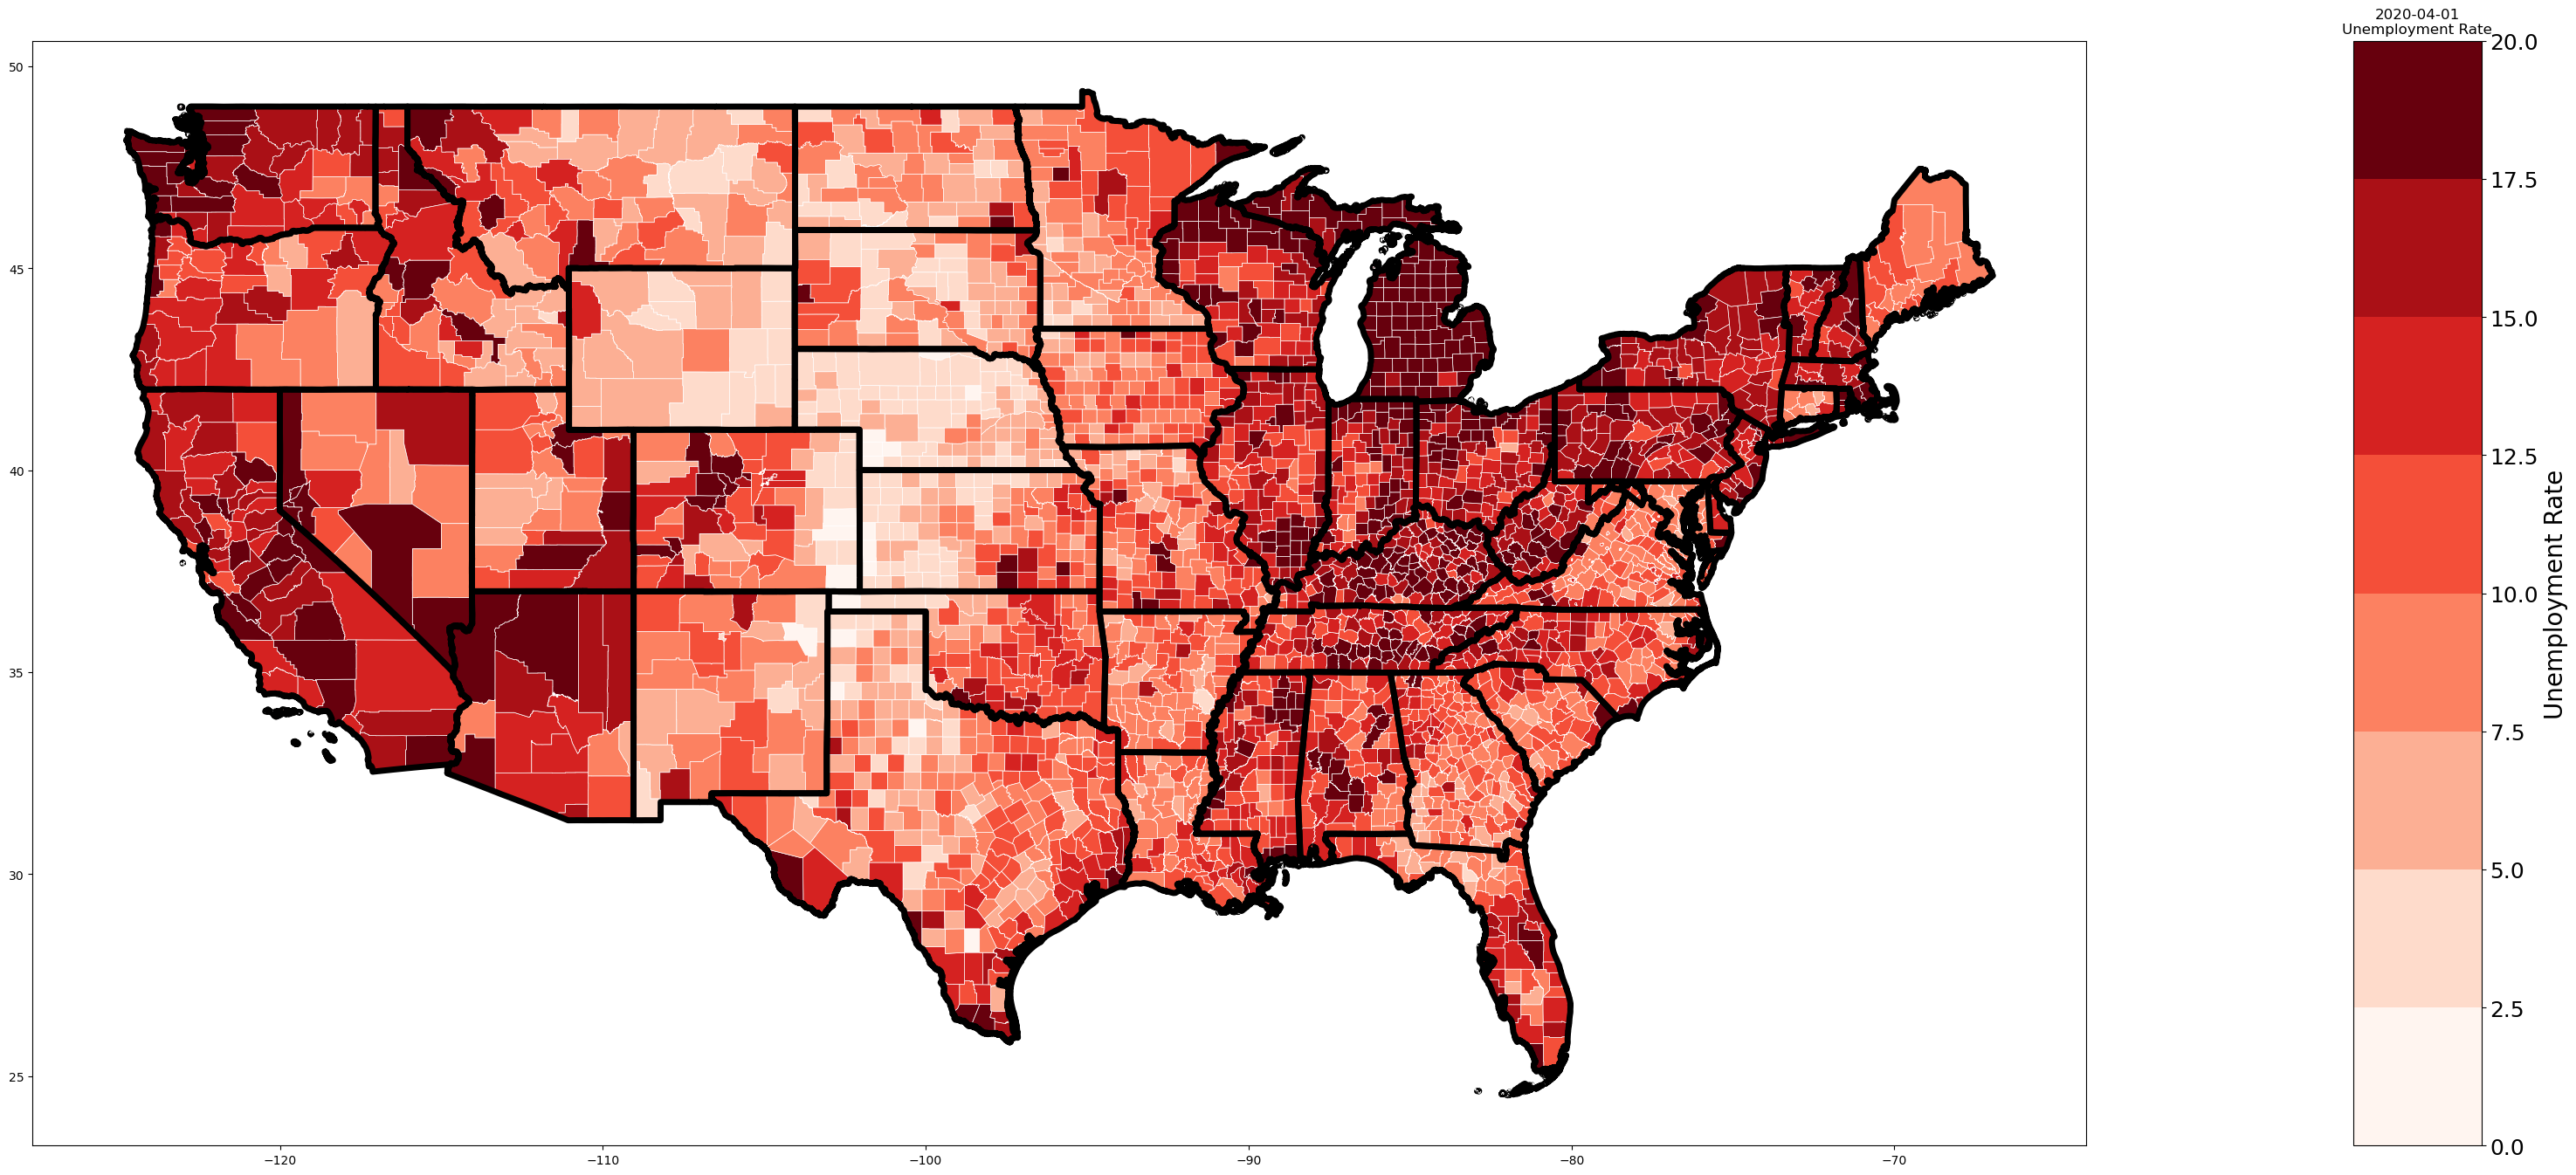

In [ ]:
# create a u_data plot copy for our plot, select not in Hawaii or Alaska,
key ="Unemployment Rate"
plot_data = u_data[key].copy()
plot_data = plot_data[~plot_data["state"].isin(["Hawaii", "Alaska"])]
state_df = plot_data.dissolve(by=["state"], aggfunc = "median")
for date in dates:
    fig, ax = plt.subplots(figsize = (40,20))



    vmin = 0
    vmax = 20
    # choose colorbar format, which colors, # divisions, etc.
    cmap = cm.get_cmap("Reds", 
                       8)
    # choose range of color bar using vmin and vmax values
    norm = cm.colors.Normalize(vmin = vmin, 
                              vmax = vmax)
    sm = cm.ScalarMappable(cmap = cmap, 
                           norm = norm)
    # prepare space for colorbar on fig
    divider = make_axes_locatable(ax)
    size = "5%"
    cax = divider.append_axes("right", 
                              size = size, 
                              pad = .1,)
    # add colorbar to space in fig
    cbar = fig.colorbar(sm, cax = cax, cmap = cmap)
    cbar.ax.tick_params(labelsize = 18)
    vals = list(cbar.ax.get_yticks())
    # append max values from plot_df[dates] to vals for cbar
    vals.append(plot_data[dates].max().max())
    cbar.ax.set_ylabel(key, fontsize = 20)
    plot_data.plot(ax = ax, 
            cax = ax,
           column = date,
           cmap = cmap,
           legend = False,
           linewidth = .5,
           edgecolor = "white",
           norm = norm)

    state_df.plot(color = "None",
                 alpha = 1,
                 edgecolor = "k",
                 linewidth = 5,
                 ax = ax)

    plt.title(str(date)[:10] + "\n" + key)

In [ ]:
# create a u_data plot copy for our plot, select not in Hawaii or Alaska,

# plot the new_key which shows values in proportion to Feb 2020
key = new_key
plot_data = u_data[key].copy()
plot_data = plot_data[~plot_data["state"].isin(["Hawaii", "Alaska"])]
state_df = plot_data.dissolve(by=["state"], aggfunc = "median")
for date in dates:
    fig, ax = plt.subplots(figsize = (40,20))



    vmin = -20
    vmax = 20
    # choose colorbar format, which colors, # divisions, etc.
    cmap = cm.get_cmap("coolwarm", 
                       15)
    # choose range of color bar using vmin and vmax values
    norm = cm.colors.Normalize(vmin = vmin, 
                              vmax = vmax)
    sm = cm.ScalarMappable(cmap = cmap, 
                           norm = norm)
    # prepare space for colorbar on fig
    divider = make_axes_locatable(ax)
    size = "5%"
    cax = divider.append_axes("right", 
                              size = size, 
                              pad = .1,)
    # add colorbar to space in fig
    cbar = fig.colorbar(sm, cax = cax, cmap = cmap)
    cbar.ax.tick_params(labelsize = 18)
    vals = list(cbar.ax.get_yticks())
    # append max values from plot_df[dates] to vals for cbar
    vals.append(plot_data[dates].max().max())
    cbar.ax.set_ylabel(key, fontsize = 20)
    plot_data.plot(ax = ax, 
            cax = ax,
           column = date,
           cmap = cmap,
           legend = False,
           linewidth = .5,
           edgecolor = "white",
           norm = norm)

    state_df.plot(color = "None",
                 alpha = 1,
                 edgecolor = "k",
                 linewidth = 5,
                 ax = ax)

    plt.title(str(date)[:10] + "\n" + key)

# Create Interactive Map with Plotly

In [ ]:
import plotly.express as px


In [ ]:
key = "Unemployment Rate"
plot_df = u_data[key].copy()
plot_df = plot_df.to_crs(epsg=4326).rename(
    columns = {date:str(date)[:10] for date in plot_df[dates].keys()})
cname = str(dates[-1])[:10]
plot_df[cname] = plot_df[cname].round(2)
hover_name = "NAME"
fig = px.choropleth_mapbox(plot_df.reset_index(),
                          geojson = plot_df, #scans geometry
                          locations = "FIPS", #plotly recognizes fips_code
                          hover_name = hover_name,
                           hover_data =[cname],
                          color = cname,
                           color_continuous_scale ="ylgnbu",
                           # take averages of longitude and latitude
                           # using the geometry and centroid.var.mean()
                          center = {"lat":plot_df["geometry"].centroid.y.mean(),
                                    "lon":plot_df["geometry"].centroid.x.mean()},
                          zoom =4,
                          opacity = .6,
                          title = key,
                          mapbox_style = "carto-positron",
                          height = 900)

# save as html
# fig.show()
fig.write_html(key+".html")

In [ ]:
map_path = gpd.datasets.get_path(
    "naturalearth_lowres")
world = gpd.read_file(map_path).to_crs(epsg = 4326)
world.set_index("iso_a3", inplace = True)
world

In [ ]:
# look at the different things available lol

# allows inspection of different databases through OSwalk

import os
list(os.walk("C:\\Users\\Bryce Grabanski\\AppData\\Roaming\\Python\\Python39\\site-packages\\geopandas\\datasets"))

In [ ]:
EFW = pd.read_csv("fraserDataWithRGDPPC.csv",
                 index_col = ["ISO_Code_3","Year"],
                 parse_dates = True).rename(columns = {"Summary":"EFW"})

EFW_Keys = ["EFW",
           "Size of Government",
            "Legal System and Property Rights",
           "Sound Money",
           "Freedom to Trade Internationally",
           "Regulation",
           "RGDP Per Capita"]
EFW[EFW_Keys]

In [ ]:
# create a dataframe that is only 2018 data
EFW_2018 = EFW[EFW.index.get_level_values(
    "Year") == "2018"].reset_index().set_index("ISO_Code_3")
for key in EFW_Keys:
    world[key + " 2018"] = EFW_2018[key]
world

In [ ]:
# Cities 
cities_path = gpd.datasets.get_path(
    'naturalearth_cities')
cities = gpd.read_file(cities_path).to_crs(epsg=4326)
cities["Country"] = ""
#cities["Country"].iloc[0] = "ITA"



In [ ]:
for ix in cities.index:
    try:
        # save country name if city is found within it's bounds through
        # world geometry in a boolean index that is 
        # row is True if city in country geometry
        row_with_city = world["geometry"].contains(
                cities.loc[ix]["geometry"])
        cities.loc[ix, "Country"] = world[row_with_city].index[0] 
    except:
        continue
cities[cities["Country"] != ""]

In [ ]:
cities[cities["Country"] == ""]

In [ ]:
# see that a small amount of locations don't automatically 
# get assigned a country like istanbul because of low-res map
world.loc[["TUR"]].plot()

In [ ]:
#import matplotlib.patheffects as pe

In [ ]:
for key in EFW_Keys:
    column = key + " 2018"
    fig, ax = plt.subplots(figsize = (40,20))
    cmap = cm.get_cmap("Blues", 12)
    norm = cm.colors.Normalize(vmin = world[column].min(),
                              vmax = world[column].max())
    sm = cm.ScalarMappable(cmap = cmap,
                          norm = norm)
    # prepare space for colorbar
    divider = make_axes_locatable(ax)
    size = "5%"
    cax = divider.append_axes("right",
                              size = size,
                              pad = .1)
    
    cbar = fig.colorbar(sm, cax = cax, cmap = cmap)
    cbar.ax.tick_params(labelsize = 24)
    vals = list(cbar.ax.get_yticks())
    vals.append(vmax)
    cbar.ax.set_yticklabels(vals)
    
    # create backdrop of world in grey
    world.plot(color = "k", alpha = .25, ax = ax)
    # plot countries in dataframe
    world.plot(column = column,
              cmap = cmap,
               linewidth = 1.5,
               edgecolor = "k",
              ax = ax,
              alpha = .95)
    # plot cities on map with red dot that are not blank
    cities[cities["Country"]!= ""].plot(color = "C3",
                                       markersize = 25,
                                       ax = ax)
    
    
    ax.set_title(column, fontsize = "40")
    area = world.area
    # make a way to display the 3 letter country name
    for ix in world.index:
        if area[ix] >= area["IRL"]:
            centroid = world.loc[ix]["geometry"].representative_point()
            x,y = centroid.x, centroid.y
            ax.text(x, y, ix, 
                    va = "center", ha = "center", 
                    fontsize = 9)
                   #path_effects = [pe.withStroke(linewidth =1, foreground = "white")])